<h1>Crash Course in Causality: Data Preparation for Causal Analysis</h1>

<h3>Abstract</h3>

This notebook introduces fundamental concepts in causal inference and their application to data preparation for machine learning models. We explore how proper data handling supports valid causal conclusions, moving beyond mere correlation to establish causation relationships. Using the Portuguese "Vinho Verde" red wine quality dataset, we demonstrate essential techniques for preparing data within a causal framework, including proper handling of confounders, implementing causal discovery methods, and establishing causal graphs. Readers will learn to distinguish between predictive and causal models, understand how data preparation decisions impact causal conclusions, and implement practical techniques for causal inference using Python. These skills are crucial for researchers and data scientists who want to not only predict outcomes but understand the underlying mechanisms that generate the data.

<h3> Introduction to Causality in Data Science </h3>

<h4>From Correlation to Causation</h4>
One of the most repeated mantras in data science is "correlation does not imply causation." This phrase highlights a fundamental challenge: while machine learning excels at finding patterns and correlations in data, these patterns don't necessarily reveal causal relationships. Understanding causality is crucial because it allows us to:

<h4>Predict the effects of interventions</h4>
Make better policy decisions
Understand the mechanisms behind observed phenomena
Build more robust, generalizable models

Consider our wine quality dataset: we might observe that wines with higher alcohol content tend to receive higher quality ratings. But does increasing alcohol content cause better wine quality? Or is there a common cause, such as grape ripeness, that affects both alcohol content and quality? Without causal analysis, we can't distinguish between these possibilities.

In [ ]:
from IPython.display import Image

# Specify the full path to your image file
image_path = r'D:\Study\Sem 4\ADS\c1.png'

# Display the image with custom width and height
Image(filename=image_path, width=800, height=600)

Pearl's "Ladder of Causation" provides a framework for understanding different levels of causal reasoning:

**Association (Level 1)**: Observing correlations and patterns (e.g., wines with more alcohol tend to have higher quality ratings)
**Intervention (Level 2)**: Predicting effects of actions or interventions (e.g., if we increase alcohol content, will quality improve?)
**Counterfactuals (Level 3)**: Reasoning about what would have happened under different circumstances (e.g., would this specific wine have been higher quality if it had more alcohol?)

Most machine learning operates at Level 1, while causal inference aims to reach Levels 2 and 3.

<h3>The Role of Data Preparation in Causal Analysis</h3>
    
Data preparation is even more critical for causal analysis than for predictive modeling. Key considerations include:

Identifying and handling confounders: Variables that affect both the treatment and outcome
Selection bias: When the sample doesn't represent the population of interest
Missing data: Can lead to biased causal estimates if not handled properly
Measurement error: Can attenuate causal effects
Feature engineering: Must be done with causal structure in mind

In this notebook, we'll explore how to prepare data for causal analysis using our wine quality dataset, focusing on techniques that support valid causal inference.

</h3>About Dataset</h3>

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

<h3>Understanding the Wine Quality Dataset</h3>

Before diving into causal analysis, let's understand our dataset. The Portuguese "Vinho Verde" red wine quality dataset contains physicochemical properties of wines and their corresponding quality ratings.

In [ ]:
from IPython.display import Image

# Specify the full path to your image file
image_path = r'D:\Study\Sem 4\ADS\c3.png'

# Display the image with custom width and height
Image(filename=image_path, width=800, height=600)

<h3>Understanding the Variables</h3>

The dataset contains 11 physiochemical features and 1 target variable:

fixed acidity: Most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

volatile acidity: The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

citric acid: Found in small quantities, citric acid can add 'freshness' and flavor to wines

residual sugar: The amount of sugar remaining after fermentation stops

chlorides: The amount of salt in the wine

free sulfur dioxide: The free form of SO2 exists in equilibrium between molecular SO2 and bisulfite ion

total sulfur dioxide: Amount of free and bound forms of S02

density: The density of wine is close to that of water depending on the alcohol and sugar content

pH: Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)

sulphates: A wine additive which can contribute to sulfur dioxide gas (S02) levels

alcohol: The percent alcohol content of the wine

quality: Output variable (score between 0 and 10, based on sensory data)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styling for plots
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Load the dataset
wine_data = pd.read_csv("D:\Study\Sem 4\ADS\winequality-red.csv")

# Display basic information about the dataset
print(f"Dataset shape: {wine_data.shape}")
wine_data.head()

Dataset shape: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<h4>Exploring Data Characteristics</h4>

In [7]:
# Summary statistics
wine_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
# Check for missing values
missing_values = wine_data.isnull().sum()
print("Missing values per column:")
print(missing_values)

# If no missing values are found
if missing_values.sum() == 0:
    print("The dataset has no missing values.")

Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
The dataset has no missing values.


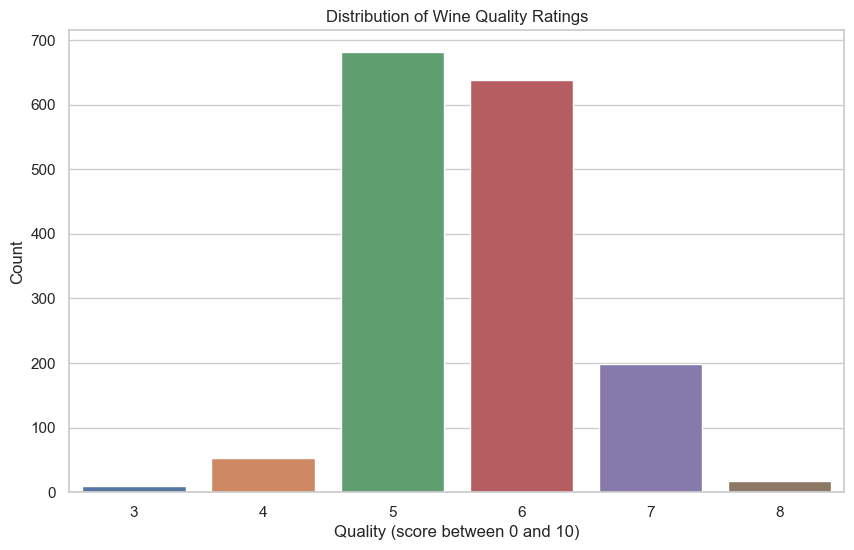

Quality ratings range from 3 to 8
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [24]:
# Distribution of the quality variable
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine_data)
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality (score between 0 and 10)')
plt.ylabel('Count')
plt.show()

print(f"Quality ratings range from {wine_data['quality'].min()} to {wine_data['quality'].max()}")
print(wine_data['quality'].value_counts().sort_index())

The quality ratings in our dataset range from 3 to 8 on a scale of 0 to 10, with most wines rated as 5 or 6. This uneven distribution is important to note for our causal analysis, as it may affect the generalizability of our findings.

<h3>Examining Relationships Between Variables</h3>

Let's look at correlations between variables to start identifying potential causal relationships:

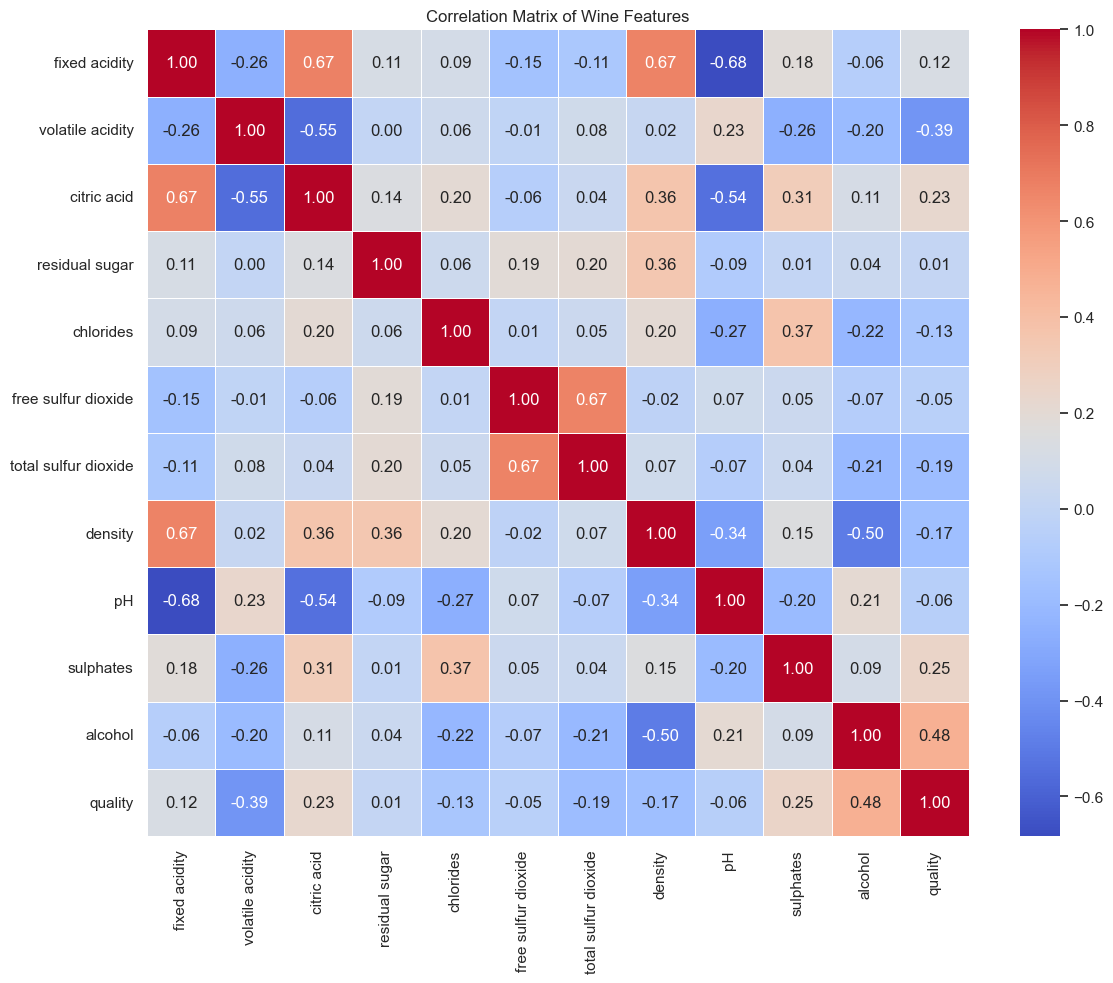

In [25]:
# Correlation matrix
correlation = wine_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Wine Features')
plt.tight_layout()
plt.show()

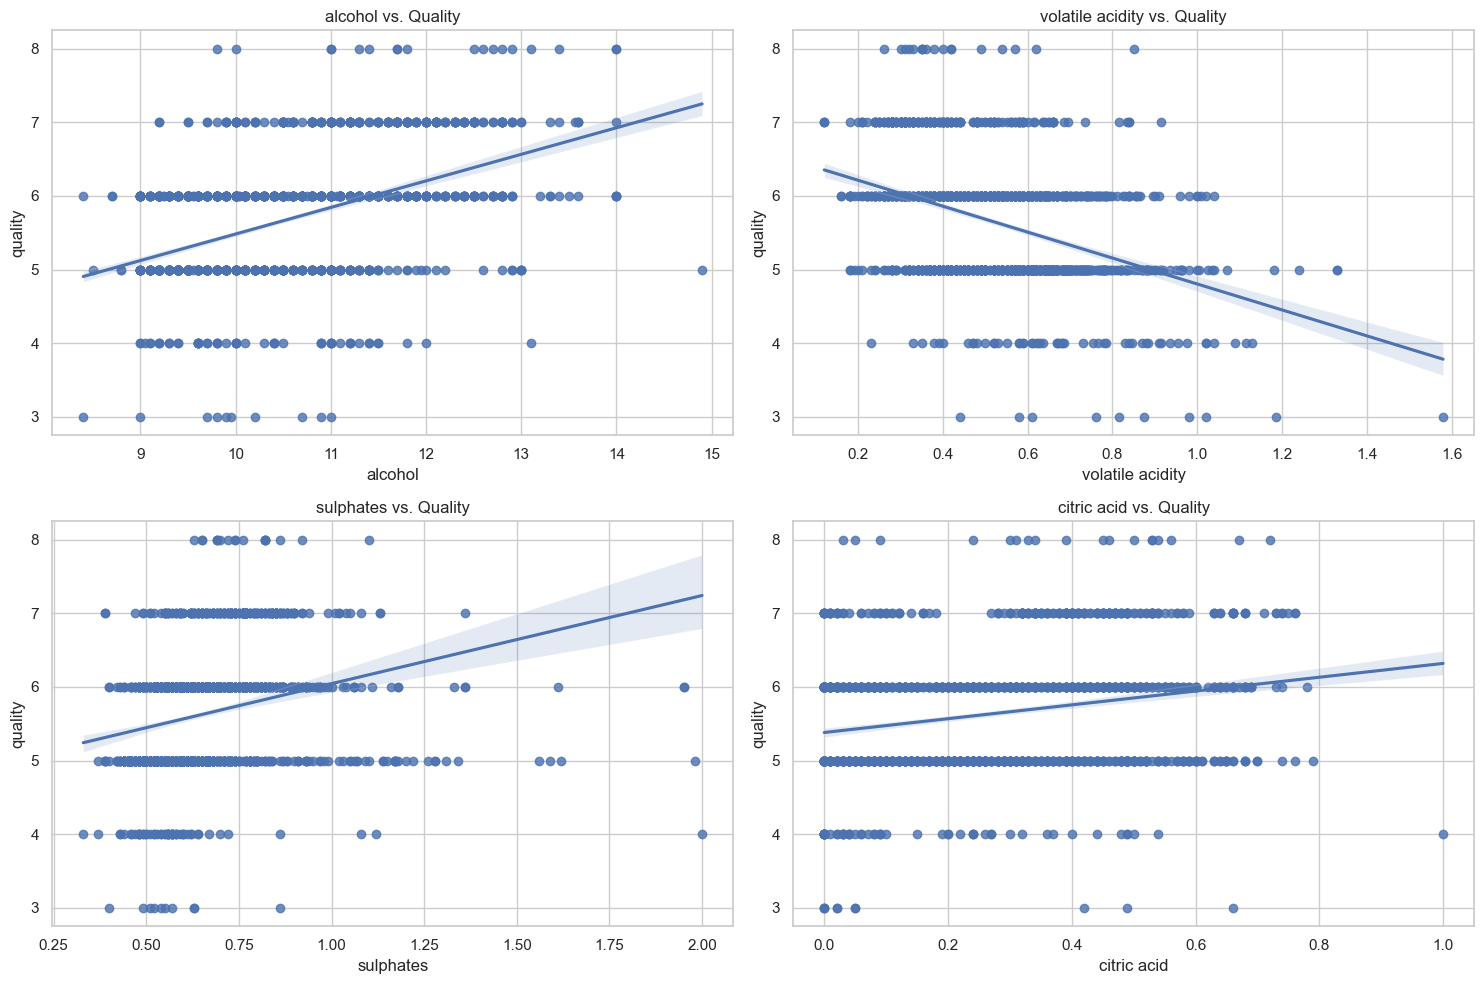

In [26]:
# Scatter plots of features vs. quality
# Select a few key features based on correlation strength
key_features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    sns.regplot(x=feature, y='quality', data=wine_data, ax=axes[i])
    axes[i].set_title(f'{feature} vs. Quality')
    
plt.tight_layout()
plt.show()

From the correlation matrix and scatter plots, we can see that:

Alcohol has a positive correlation with quality
Volatile acidity has a negative correlation with quality
Sulphates have a positive correlation with quality
Citric acid has a positive correlation with quality

While these correlations suggest relationships, they don't tell us about causality. In the following sections, we'll explore methods to distinguish between correlation and causation.

<h3>Causal Theory and Frameworks</h3>

Causal Graphs and Directed Acyclic Graphs (DAGs)
A fundamental tool in causal analysis is the causal graph, specifically the Directed Acyclic Graph (DAG). DAGs provide a visual representation of causal relationships between variables.
Key components of DAGs:

**Nodes:** Variables in the model

**Edges:** Directed arrows representing causal relationships

**Paths:** Sequences of edges that connect nodes

**Acyclic:** No variable can cause itself (no cycles)

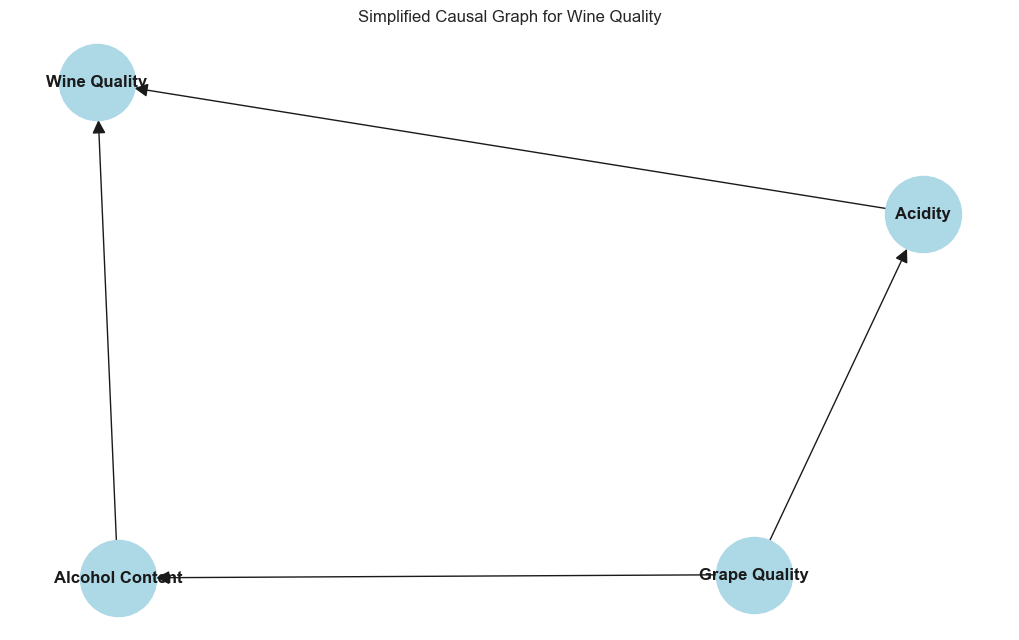

In [27]:
# Example code to create a simple DAG for wine quality
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes (variables)
nodes = ['Grape Quality', 'Acidity', 'Alcohol Content', 'Wine Quality']
G.add_nodes_from(nodes)

# Add edges (causal relationships)
edges = [
    ('Grape Quality', 'Acidity'),
    ('Grape Quality', 'Alcohol Content'),
    ('Acidity', 'Wine Quality'),
    ('Alcohol Content', 'Wine Quality')
]
G.add_edges_from(edges)

# Plot the DAG
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=3000, arrowsize=20, font_size=12, font_weight='bold')
plt.title('Simplified Causal Graph for Wine Quality')
plt.show()

This simplified DAG illustrates a potential causal structure: Grape Quality affects both Acidity and Alcohol Content, which in turn affect Wine Quality. This gives us a hypothesis to test with our data.

<h3>Confounding Variables</h3>

Confounding occurs when a variable influences both the treatment and outcome, creating a spurious association. In our wine dataset, many confounders might exist.
For example, grape ripeness might affect both alcohol content and wine quality:

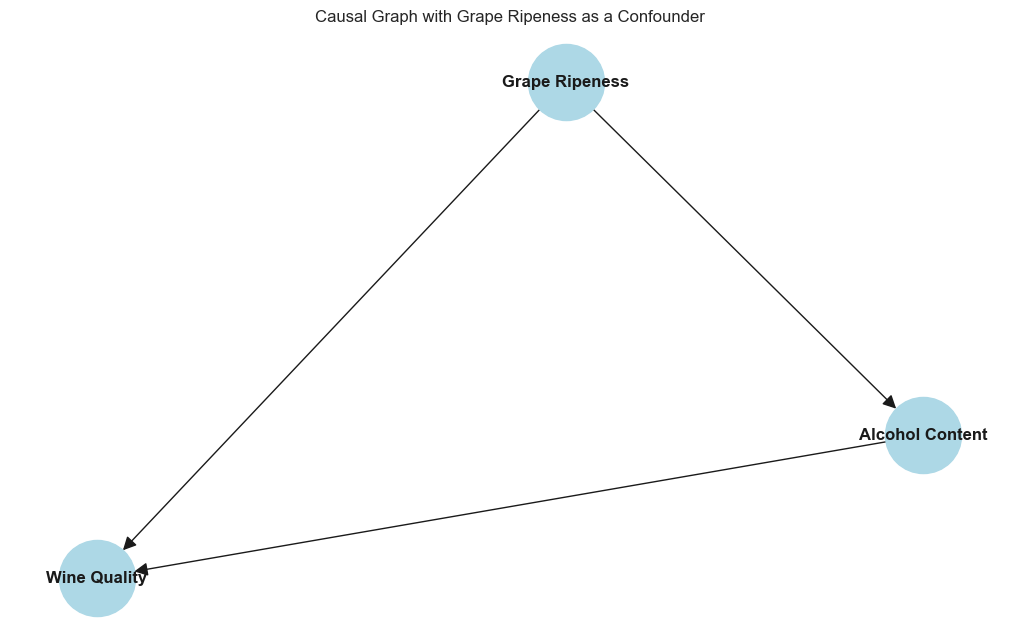

In [28]:
# Example of a DAG with a confounder
G_conf = nx.DiGraph()

# Add nodes
nodes = ['Grape Ripeness', 'Alcohol Content', 'Wine Quality']
G_conf.add_nodes_from(nodes)

# Add edges
edges = [
    ('Grape Ripeness', 'Alcohol Content'),
    ('Grape Ripeness', 'Wine Quality'),
    ('Alcohol Content', 'Wine Quality')
]
G_conf.add_edges_from(edges)

# Plot the DAG
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G_conf, seed=42)
nx.draw(G_conf, pos, with_labels=True, node_color='lightblue', 
        node_size=3000, arrowsize=20, font_size=12, font_weight='bold')
plt.title('Causal Graph with Grape Ripeness as a Confounder')
plt.show()

If we don't account for Grape Ripeness (which we don't have in our dataset), we might overestimate the causal effect of Alcohol Content on Wine Quality.

<h3>Potential Outcomes Framework</h3>
   
The potential outcomes framework, also known as the Rubin Causal Model, provides a mathematical foundation for causal inference. For each unit (in our case, wine), we define:

Y(1): The outcome if the unit receives treatment
Y(0): The outcome if the unit doesn't receive treatment

The causal effect is the difference: Y(1) - Y(0). However, we can never observe both potential outcomes for the same unit (the "fundamental problem of causal inference").

Let's conceptualize this for our wine dataset:

In [29]:
# Hypothetical example - not actual data
import pandas as pd

# Create a small sample dataset
np.random.seed(42)
sample_data = pd.DataFrame({
    'wine_id': range(1, 6),
    'alcohol_high': [1, 0, 1, 0, 0],  # Treatment: 1 = high alcohol, 0 = low alcohol
    'observed_quality': [7, 5, 6, 4, 5]  # Observed quality
})

# In reality, we only observe one potential outcome for each wine
# Let's add hypothetical potential outcomes (which we can't actually observe)
sample_data['quality_if_high_alcohol'] = [7, 6, 6, 5, 6]  # Y(1)
sample_data['quality_if_low_alcohol'] = [5, 5, 4, 4, 5]   # Y(0)

# The individual causal effect (which we can't observe in reality)
sample_data['causal_effect'] = sample_data['quality_if_high_alcohol'] - sample_data['quality_if_low_alcohol']

# Display the hypothetical data
print("Hypothetical Potential Outcomes (for illustration only):")
print(sample_data)

# Calculate the average treatment effect (ATE)
ate = sample_data['causal_effect'].mean()
print(f"\nAverage Treatment Effect: {ate}")

# In reality, we only observe this data:
print("\nWhat we actually observe in real data:")
print(sample_data[['wine_id', 'alcohol_high', 'observed_quality']])

Hypothetical Potential Outcomes (for illustration only):
   wine_id  alcohol_high  observed_quality  quality_if_high_alcohol  \
0        1             1                 7                        7   
1        2             0                 5                        6   
2        3             1                 6                        6   
3        4             0                 4                        5   
4        5             0                 5                        6   

   quality_if_low_alcohol  causal_effect  
0                       5              2  
1                       5              1  
2                       4              2  
3                       4              1  
4                       5              1  

Average Treatment Effect: 1.4

What we actually observe in real data:
   wine_id  alcohol_high  observed_quality
0        1             1                 7
1        2             0                 5
2        3             1                 6
3        4     

In practice, we use various methods to estimate causal effects from observed data, which we'll explore in the following sections.

<h3>Handling Missing Data in a Causal Context</h3>
 
Missing data can be particularly problematic for causal inference. The missingness mechanism matters:

Missing Completely at Random (MCAR): Missingness unrelated to any variables
Missing at Random (MAR): Missingness related to observed variables
Missing Not at Random (MNAR): Missingness related to unobserved variables or the missing values themselves

Let's check for missing values in our wine dataset:

In [31]:
# Check for missing values
missing_values = wine_data.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Our dataset doesn't have missing values, but let's discuss techniques for handling them
print("\nTechniques for handling missing data in a causal context:")
print("1. Complete case analysis: Remove rows with missing values")
print("2. Multiple imputation: Create multiple datasets with imputed values")
print("3. Inverse probability weighting: Weight observations by inverse probability of being observed")
print("4. Maximum likelihood: Estimate parameters accounting for missing data patterns")

Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Techniques for handling missing data in a causal context:
1. Complete case analysis: Remove rows with missing values
2. Multiple imputation: Create multiple datasets with imputed values
3. Inverse probability weighting: Weight observations by inverse probability of being observed
4. Maximum likelihood: Estimate parameters accounting for missing data patterns


<h3>Feature Engineering with Causality in Mind</h3>

Correlations with quality:
quality                  1.000000
alcohol_density_ratio    0.474980
acidity_balance          0.343939
Name: quality, dtype: float64


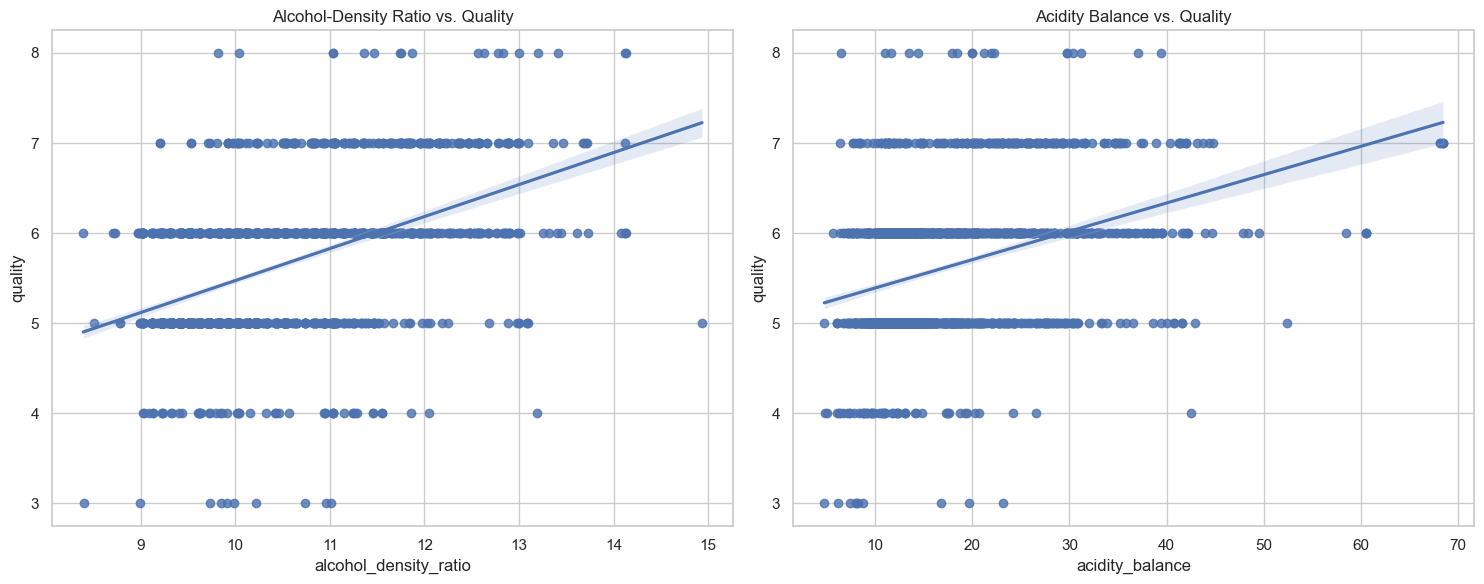

In [33]:
# Example of feature engineering that respects causal structure
# Let's create a variable that represents the ratio of alcohol to density
wine_data['alcohol_density_ratio'] = wine_data['alcohol'] / wine_data['density']

# Let's also create an acidity balance measure
wine_data['acidity_balance'] = wine_data['fixed acidity'] / (wine_data['volatile acidity'] + 0.01)  # Adding 0.01 to avoid division by zero

# Let's examine correlations with quality
new_features = ['alcohol_density_ratio', 'acidity_balance']
correlations = wine_data[new_features + ['quality']].corr()['quality'].sort_values(ascending=False)
print("Correlations with quality:")
print(correlations)

# Visualize the new features vs. quality
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.regplot(x='alcohol_density_ratio', y='quality', data=wine_data, ax=axes[0])
axes[0].set_title('Alcohol-Density Ratio vs. Quality')

sns.regplot(x='acidity_balance', y='quality', data=wine_data, ax=axes[1])
axes[1].set_title('Acidity Balance vs. Quality')

plt.tight_layout()
plt.show()

<h3>Dealing with Confounders</h3>
 
Confounders are variables that influence both the treatment and outcome. We need to control for confounders to estimate causal effects. Common approaches include:

**Stratification:** Analyzing data within subgroups defined by confounder values

**Matching:** Comparing treated units with similar control units

**Regression adjustment:** Including confounders as control variables

**Propensity score methods:** Balancing treated and control units based on propensity scores

**Instrumental variables:** Using variables that affect treatment but not outcome directly

Mean quality by pH category and alcohol level:
             Low Alcohol  High Alcohol  Difference
pH_category                                       
Low             5.373494      6.197248    0.823754
Medium          5.288256      6.028226    0.739970
High            5.296943      5.783505    0.486562


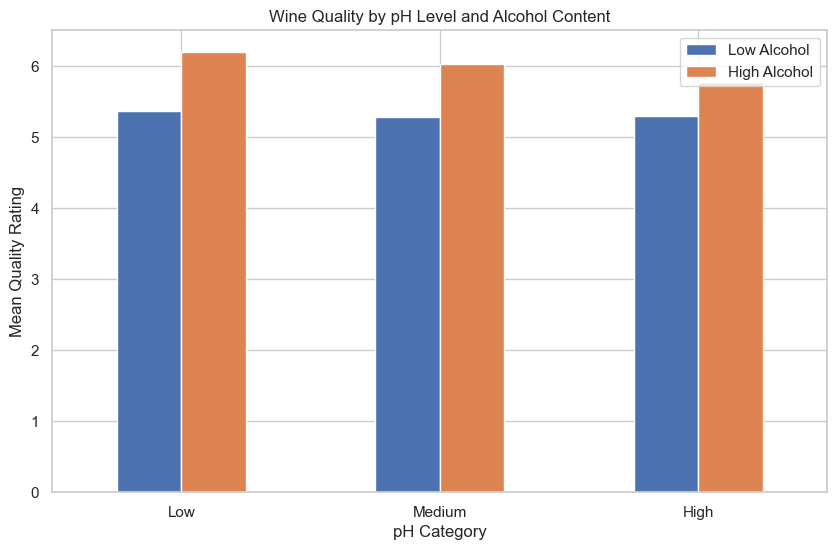


Naive estimate (not controlling for pH):
Mean quality for low alcohol: 5.32
Mean quality for high alcohol: 5.98
Difference: 0.66

Stratified estimate (controlling for pH):
Weighted average difference: 0.69


In [34]:
# Stratification example
# Convert alcohol to a binary variable (high/low)
median_alcohol = wine_data['alcohol'].median()
wine_data['high_alcohol'] = (wine_data['alcohol'] > median_alcohol).astype(int)

# Potential confounder: pH (affects both alcohol content and quality)
# Stratify by pH levels
wine_data['pH_category'] = pd.qcut(wine_data['pH'], 3, labels=['Low', 'Medium', 'High'])

# Calculate mean quality by alcohol level and pH category
stratified_means = wine_data.groupby(['pH_category', 'high_alcohol'])['quality'].mean().unstack()
stratified_means.columns = ['Low Alcohol', 'High Alcohol']
stratified_means['Difference'] = stratified_means['High Alcohol'] - stratified_means['Low Alcohol']

print("Mean quality by pH category and alcohol level:")
print(stratified_means)

# Visualize
stratified_means[['Low Alcohol', 'High Alcohol']].plot(kind='bar', figsize=(10, 6))
plt.title('Wine Quality by pH Level and Alcohol Content')
plt.xlabel('pH Category')
plt.ylabel('Mean Quality Rating')
plt.xticks(rotation=0)
plt.legend()
plt.show()

# Calculate the overall difference (naive estimate)
naive_diff = wine_data.groupby('high_alcohol')['quality'].mean()
print("\nNaive estimate (not controlling for pH):")
print(f"Mean quality for low alcohol: {naive_diff[0]:.2f}")
print(f"Mean quality for high alcohol: {naive_diff[1]:.2f}")
print(f"Difference: {naive_diff[1] - naive_diff[0]:.2f}")

# Calculate the stratified estimate (controlling for pH)
weighted_diff = (stratified_means['Difference'] * wine_data['pH_category'].value_counts(normalize=True)).sum()
print("\nStratified estimate (controlling for pH):")
print(f"Weighted average difference: {weighted_diff:.2f}")

The difference between the naive estimate and the stratified estimate reveals the impact of controlling for confounders.

<h3>Data Discretization and Its Impact on Causal Inference</h3>

Discretizing continuous variables is common in data preparation but can affect causal inference:

Quality by alcohol category:
                      mean       std  count
alcohol_category                           
Very Low          5.256881  0.540815    436
Low               5.396552  0.728867    406
Medium            5.737401  0.783817    377
High              6.226316  0.806531    380


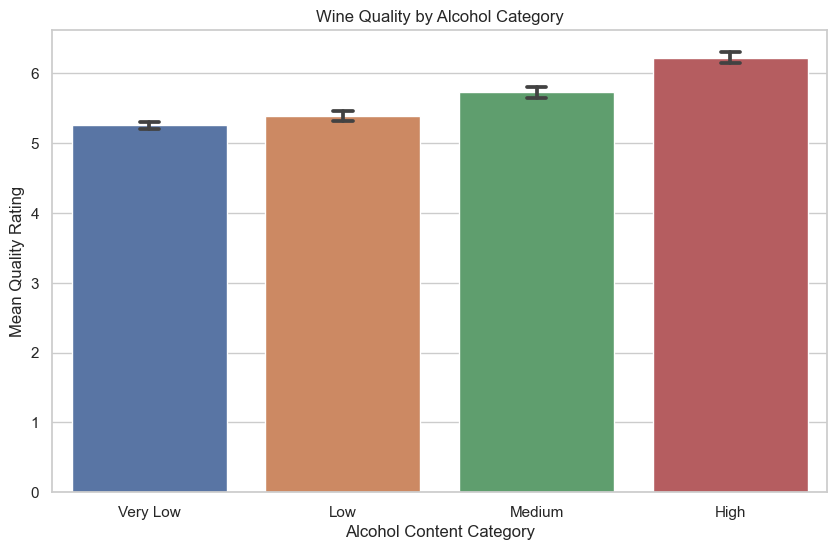


Correlation with quality (continuous alcohol): 0.476
Correlation with quality (discretized alcohol): 0.449
Information loss: 5.7%


In [36]:
# Example of discretization
# Discretize alcohol content
wine_data['alcohol_category'] = pd.qcut(wine_data['alcohol'], 4, labels=['Very Low', 'Low', 'Medium', 'High'])

# Examine quality by alcohol category
alcohol_quality = wine_data.groupby('alcohol_category')['quality'].agg(['mean', 'std', 'count'])
print("Quality by alcohol category:")
print(alcohol_quality)

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='alcohol_category', y='quality', data=wine_data, capsize=0.1)
plt.title('Wine Quality by Alcohol Category')
plt.xlabel('Alcohol Content Category')
plt.ylabel('Mean Quality Rating')
plt.show()

# Demonstrate information loss through discretization
# Calculate correlation with continuous variable
corr_continuous = wine_data['alcohol'].corr(wine_data['quality'])
# Convert categorical to numeric and calculate correlation
alcohol_cat_numeric = wine_data['alcohol_category'].cat.codes
corr_discrete = alcohol_cat_numeric.corr(wine_data['quality'])

print(f"\nCorrelation with quality (continuous alcohol): {corr_continuous:.3f}")
print(f"Correlation with quality (discretized alcohol): {corr_discrete:.3f}")
print(f"Information loss: {(corr_continuous - corr_discrete) / corr_continuous * 100:.1f}%")

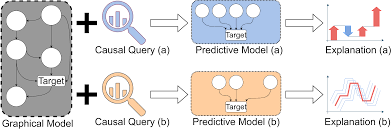

In [58]:
from IPython.display import Image

# Specify the full path to your image file
image_path = r'D:\Study\Sem 4\ADS\c2.png'

# Display the image with custom width and height
Image(filename=image_path, width=800, height=600)

<h3>Applying Causal Methods to Wine Quality Analysis</h3>

<h4>Identifying the Causal Effect of Alcohol on Wine Quality</h4>

In [59]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# In formula notation, replace spaces with underscores or use Q() function
# Naive model (not controlling for confounders)
naive_model = smf.ols('quality ~ alcohol', data=wine_data).fit()
print("Naive model results:")
print(naive_model.summary().tables[1])

# Model controlling for potential confounders - fixing the column names with spaces
causal_model = smf.ols('quality ~ alcohol + `volatile acidity` + sulphates + pH + chlorides', 
                      data=wine_data).fit()
print("\nCausal model results (controlling for confounders):")
print(causal_model.summary().tables[1])

# Compare the coefficient for alcohol
print("\nComparison of alcohol coefficients:")
print(f"Naive estimate: {naive_model.params['alcohol']:.4f}")
print(f"Causal estimate: {causal_model.params['alcohol']:.4f}")
print(f"Percent change: {(causal_model.params['alcohol'] - naive_model.params['alcohol']) / naive_model.params['alcohol'] * 100:.1f}%")

Naive model results:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8750      0.175     10.732      0.000       1.532       2.218
alcohol        0.3608      0.017     21.639      0.000       0.328       0.394


PatsyError: error tokenizing input (maybe an unclosed string?)
    quality ~ alcohol + `volatile acidity` + sulphates + pH + chlorides
                       ^

<h4>Propensity Score Matching for Causal Inference</h4>

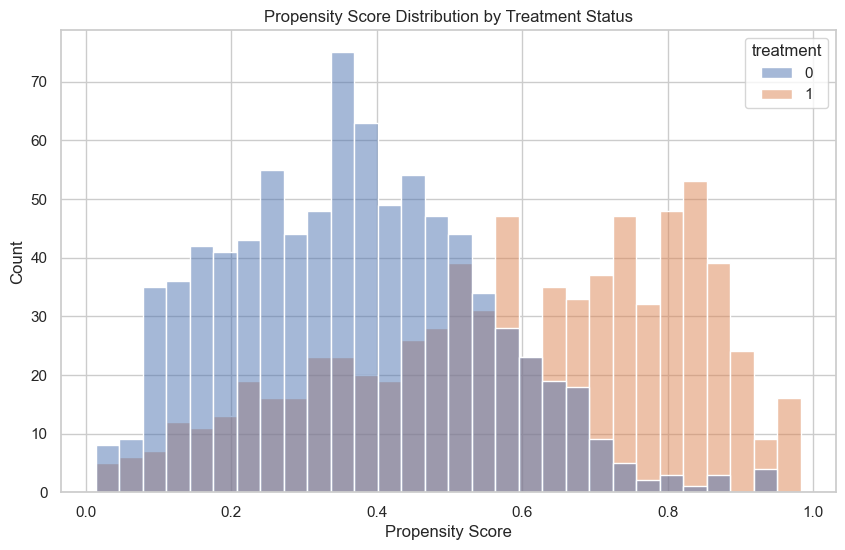

Balance before matching (difference in means):
volatile acidity: -0.0725
sulphates: 0.0334
pH: 0.0519
chlorides: -0.0168
density: -0.0014

Balance after matching (difference in means):
volatile acidity: 0.0224
sulphates: -0.1159
pH: 0.0185
chlorides: -0.0064
density: -0.0006

Average Treatment Effect (Matching):
Mean quality for high alcohol: 5.9828
Mean quality for low alcohol: 5.5192
Difference: 0.4637

Comparison of estimates:
Naive estimate: 0.6586
Matching estimate: 0.4637
Percent change: -29.6%


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Define treatment: high alcohol content (1) vs. low alcohol content (0)
median_alcohol = wine_data['alcohol'].median()
wine_data['treatment'] = (wine_data['alcohol'] > median_alcohol).astype(int)

# Potential confounders
confounders = ['volatile acidity', 'sulphates', 'pH', 'chlorides', 'density']

# Standardize confounders
scaler = StandardScaler()
X = scaler.fit_transform(wine_data[confounders])

# Estimate propensity scores
propensity_model = LogisticRegression(max_iter=1000)
propensity_model.fit(X, wine_data['treatment'])
wine_data['propensity_score'] = propensity_model.predict_proba(X)[:, 1]

# Display propensity score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=wine_data, x='propensity_score', hue='treatment', bins=30, common_norm=False)
plt.title('Propensity Score Distribution by Treatment Status')
plt.xlabel('Propensity Score')
plt.ylabel('Count')
plt.show()

# Perform matching
from sklearn.neighbors import NearestNeighbors

# Separate treated and control groups
treated = wine_data[wine_data['treatment'] == 1]
control = wine_data[wine_data['treatment'] == 0]

# Find matches
nbrs = NearestNeighbors(n_neighbors=1).fit(control['propensity_score'].values.reshape(-1, 1))
indices = nbrs.kneighbors(treated['propensity_score'].values.reshape(-1, 1))[1].flatten()

# Create matched dataset
matched_control = control.iloc[indices]
matched_data = pd.concat([treated, matched_control])

# Check balance after matching
balance_before = {}
balance_after = {}
for confounder in confounders:
    # Before matching
    treated_mean = wine_data[wine_data['treatment'] == 1][confounder].mean()
    control_mean = wine_data[wine_data['treatment'] == 0][confounder].mean()
    balance_before[confounder] = treated_mean - control_mean
    
    # After matching
    treated_mean_matched = matched_data[matched_data['treatment'] == 1][confounder].mean()
    control_mean_matched = matched_data[matched_data['treatment'] == 0][confounder].mean()
    balance_after[confounder] = treated_mean_matched - control_mean_matched

print("Balance before matching (difference in means):")
for confounder, diff in balance_before.items():
    print(f"{confounder}: {diff:.4f}")

print("\nBalance after matching (difference in means):")
for confounder, diff in balance_after.items():
    print(f"{confounder}: {diff:.4f}")

# Estimate causal effect after matching
treated_outcome = matched_data[matched_data['treatment'] == 1]['quality'].mean()
control_outcome = matched_data[matched_data['treatment'] == 0]['quality'].mean()
ate_matching = treated_outcome - control_outcome

print("\nAverage Treatment Effect (Matching):")
print(f"Mean quality for high alcohol: {treated_outcome:.4f}")
print(f"Mean quality for low alcohol: {control_outcome:.4f}")
print(f"Difference: {ate_matching:.4f}")

# Compare with naive estimate
naive_diff = wine_data.groupby('treatment')['quality'].mean()
naive_ate = naive_diff[1] - naive_diff[0]

print("\nComparison of estimates:")
print(f"Naive estimate: {naive_ate:.4f}")
print(f"Matching estimate: {ate_matching:.4f}")
print(f"Percent change: {(ate_matching - naive_ate) / naive_ate * 100:.1f}%")

<h4>Instrumental Variables Approach</h4>

In [52]:
# Instrumental Variables approach
# First stage: Regress treatment on instrument
first_stage = smf.ols('alcohol ~ density', data=wine_data).fit()
wine_data['predicted_alcohol'] = first_stage.predict()

# Second stage: Regress outcome on predicted treatment
second_stage = smf.ols('quality ~ predicted_alcohol', data=wine_data).fit()

print("Instrumental Variables Results:")
print(f"First stage F-statistic: {first_stage.fvalue:.2f}")
print(f"IV estimate of alcohol effect: {second_stage.params['predicted_alcohol']:.4f}")

# Compare with OLS estimate
ols_estimate = smf.ols('quality ~ alcohol', data=wine_data).fit()
print(f"OLS estimate of alcohol effect: {ols_estimate.params['alcohol']:.4f}")

Instrumental Variables Results:
First stage F-statistic: 521.58
IV estimate of alcohol effect: 0.2672
OLS estimate of alcohol effect: 0.3608


Note: A valid instrument must satisfy three conditions:


Relevance: The instrument must be correlated with the treatment

Exclusion restriction: The instrument affects the outcome only through the treatment

Independence: The instrument is independent of unmeasured confounders


<h4>Causal Mediation Analysis</h4>

Mediation Analysis Results:
Total effect: 0.3608
Direct effect: 0.3862
Indirect effect: -0.0253
Proportion mediated: -7.0%


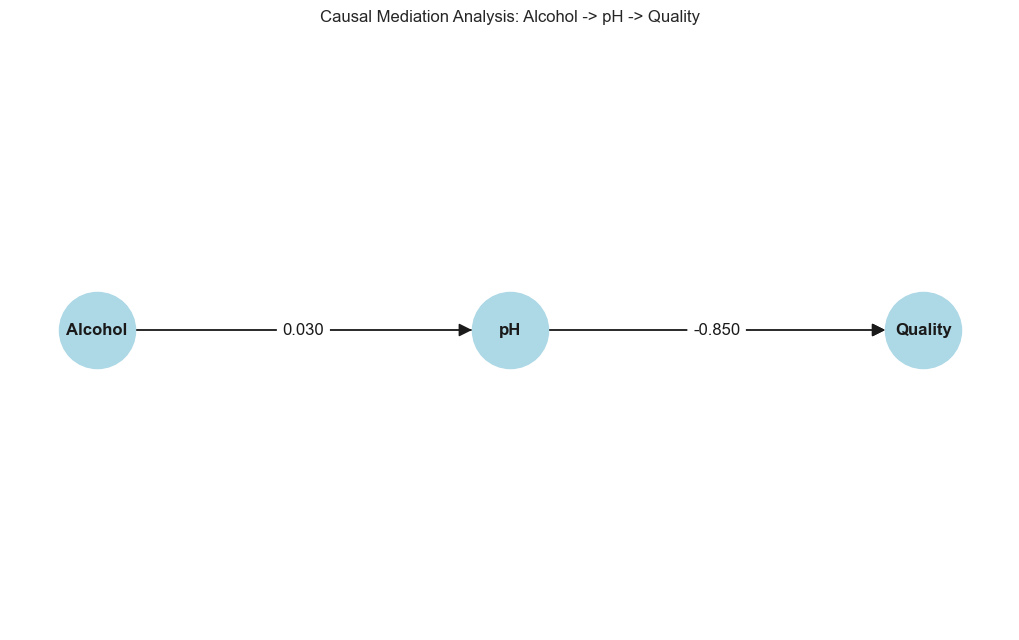

In [53]:
# Mediation analysis
# Direct effect: Alcohol -> Quality
# Indirect effect: Alcohol -> pH -> Quality

# Step 1: Effect of treatment on outcome
total_effect_model = smf.ols('quality ~ alcohol', data=wine_data).fit()
total_effect = total_effect_model.params['alcohol']

# Step 2: Effect of treatment on mediator
mediator_model = smf.ols('pH ~ alcohol', data=wine_data).fit()
effect_on_mediator = mediator_model.params['alcohol']

# Step 3: Effects of mediator and treatment on outcome
full_model = smf.ols('quality ~ alcohol + pH', data=wine_data).fit()
direct_effect = full_model.params['alcohol']
mediator_effect = full_model.params['pH']

# Calculate indirect effect
indirect_effect = effect_on_mediator * mediator_effect

print("Mediation Analysis Results:")
print(f"Total effect: {total_effect:.4f}")
print(f"Direct effect: {direct_effect:.4f}")
print(f"Indirect effect: {indirect_effect:.4f}")
print(f"Proportion mediated: {indirect_effect / total_effect * 100:.1f}%")

# Visualize the mediation
plt.figure(figsize=(10, 6))
G_med = nx.DiGraph()
G_med.add_nodes_from(['Alcohol', 'pH', 'Quality'])
G_med.add_edges_from([('Alcohol', 'pH'), ('pH', 'Quality'), ('Alcohol', 'Quality')])

pos = {'Alcohol': (0, 0), 'pH': (1, 0), 'Quality': (2, 0)}
nx.draw(G_med, pos, with_labels=True, node_color='lightblue', 
        node_size=3000, arrowsize=20, font_size=12, font_weight='bold')

# Add edge labels
edge_labels = {
    ('Alcohol', 'pH'): f'{effect_on_mediator:.3f}',
    ('pH', 'Quality'): f'{mediator_effect:.3f}',
    ('Alcohol', 'Quality'): f'{direct_effect:.3f}'
}
nx.draw_networkx_edge_labels(G_med, pos, edge_labels=edge_labels, font_size=12)

plt.title('Causal Mediation Analysis: Alcohol -> pH -> Quality')
plt.axis('off')
plt.show()

<h3>Advanced Topics in Causal Inference</h3>

<h4>Sensitivity Analysis<h4>

Wine dataset columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'alcohol_density_ratio', 'acidity_balance', 'high_alcohol', 'pH_category', 'alcohol_category', 'treatment', 'propensity_score', 'predicted_alcohol', 'pH_group']
Causal model results (controlling for confounders):
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.0086      0.397     10.087      0.000       3.229       4.788
alcohol              0.3055      0.017     18.383      0.000       0.273       0.338
volatile_acidity    -1.0687      0.101    -10.594      0.000      -1.267      -0.871
sulphates            0.8474      0.110      7.675      0.000       0.631       1.064
pH                  -0.4173      0.117     -3.575      0.000      -0.646

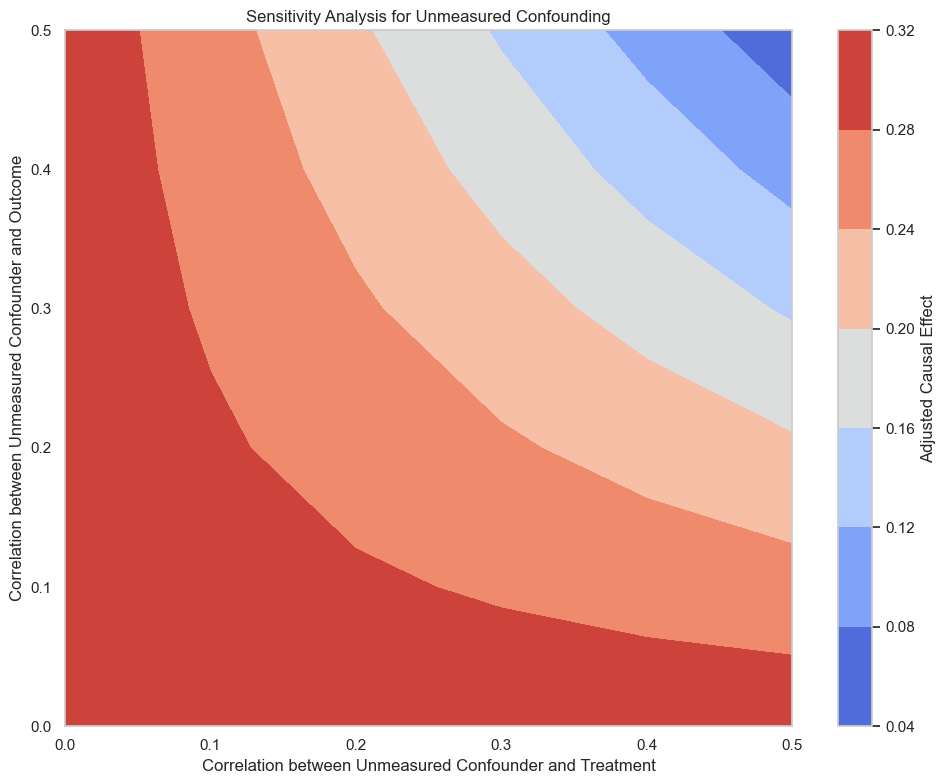

Interpretation of Sensitivity Analysis:
The contour plot shows how the estimated causal effect would change with
different levels of unmeasured confounding. The dashed black line shows
combinations of correlations that would make the causal effect zero.
Our current estimate is 0.3055.


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Let's first check column names to ensure they match exactly
print("Wine dataset columns:", wine_data.columns.tolist())

# Let's rename columns with spaces to make the formula cleaner
wine_data_clean = wine_data.copy()
wine_data_clean.columns = [col.replace(' ', '_') for col in wine_data.columns]

# Now create the causal model with the cleaned column names
causal_model = smf.ols('quality ~ alcohol + volatile_acidity + sulphates + pH + chlorides', 
                      data=wine_data_clean).fit()

print("Causal model results (controlling for confounders):")
print(causal_model.summary().tables[1])

# Get current estimate of the effect of alcohol on quality
current_estimate = causal_model.params['alcohol']

# Function to calculate bias due to unmeasured confounder
def calculate_bias(r_uz, r_uy):
    """
    Calculate bias due to unmeasured confounder
    r_uz: correlation between unmeasured confounder and treatment (alcohol)
    r_uy: correlation between unmeasured confounder and outcome (quality)
    """
    return r_uz * r_uy

# Create grid of possible correlations
r_values = np.linspace(0, 0.5, 6)  # Correlations from 0 to 0.5
r_uz_grid, r_uy_grid = np.meshgrid(r_values, r_values)
bias_grid = calculate_bias(r_uz_grid, r_uy_grid)

# Calculate adjusted estimates
adjusted_estimates = current_estimate - bias_grid

# Plot contours of adjusted estimates
plt.figure(figsize=(10, 8))
contour = plt.contourf(r_uz_grid, r_uy_grid, adjusted_estimates, cmap='coolwarm')
plt.colorbar(contour, label='Adjusted Causal Effect')
plt.xlabel('Correlation between Unmeasured Confounder and Treatment')
plt.ylabel('Correlation between Unmeasured Confounder and Outcome')
plt.title('Sensitivity Analysis for Unmeasured Confounding')

# Add contour line for zero effect
plt.contour(r_uz_grid, r_uy_grid, adjusted_estimates, levels=[0], colors='black', linestyles='dashed')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Interpretation of Sensitivity Analysis:")
print("The contour plot shows how the estimated causal effect would change with")
print("different levels of unmeasured confounding. The dashed black line shows")
print("combinations of correlations that would make the causal effect zero.")
print(f"Our current estimate is {current_estimate:.4f}.")

<h4>Causal Effect Heterogeneity</h4>

Column names in dataset: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'alcohol_density_ratio', 'acidity_balance', 'high_alcohol', 'pH_category', 'alcohol_category', 'treatment', 'propensity_score', 'predicted_alcohol', 'pH_group']
Causal model results:
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.0086      0.397     10.087      0.000       3.229       4.788
alcohol                   0.3055      0.017     18.383      0.000       0.273       0.338
Q("volatile acidity")    -1.0687      0.101    -10.594      0.000      -1.267      -0.871
sulphates                 0.8474      0.110      7.675      0.000       0.631       1.064
pH                       -0.4173      0.117     -3.575      0.000    

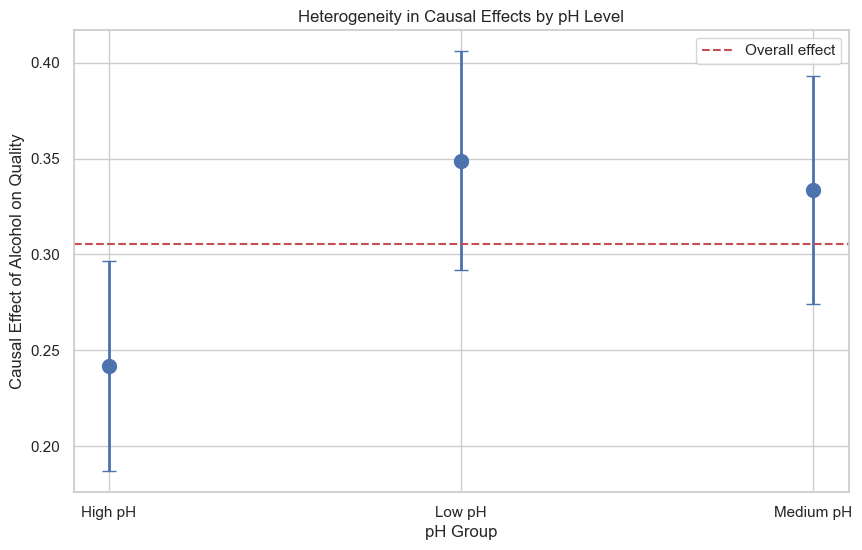


Interpretation:
The graph shows how the causal effect of alcohol on wine quality varies across
different pH groups. This heterogeneity suggests that the mechanism by which
alcohol affects quality depends on the wine's acidity level.


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from patsy import dmatrices

# Print column names to verify
print("Column names in dataset:", wine_data.columns.tolist())

# Create the model using Q() to handle spaces in variable names
causal_model = smf.ols('quality ~ alcohol + Q("volatile acidity") + sulphates + pH + chlorides', 
                      data=wine_data).fit()

print("Causal model results:")
print(causal_model.summary().tables[1])

# Create subgroups based on pH
wine_data['pH_group'] = pd.qcut(wine_data['pH'], 3, labels=['Low pH', 'Medium pH', 'High pH'])

# Estimate causal effect within each subgroup
heterogeneity_results = {}
for group in wine_data['pH_group'].unique():
    subgroup_data = wine_data[wine_data['pH_group'] == group]
    # Use Q() for column names with spaces
    model = smf.ols('quality ~ alcohol + Q("volatile acidity") + sulphates + chlorides', 
                   data=subgroup_data).fit()
    heterogeneity_results[group] = {
        'effect': model.params['alcohol'],
        'std_err': model.bse['alcohol'],
        'sample_size': len(subgroup_data)
    }

# Display results
heterogeneity_df = pd.DataFrame(heterogeneity_results).T
heterogeneity_df['lower_ci'] = heterogeneity_df['effect'] - 1.96 * heterogeneity_df['std_err']
heterogeneity_df['upper_ci'] = heterogeneity_df['effect'] + 1.96 * heterogeneity_df['std_err']
print("Causal Effect Heterogeneity by pH Group:")
print(heterogeneity_df)

# Visualize
plt.figure(figsize=(10, 6))
plt.errorbar(heterogeneity_df.index, heterogeneity_df['effect'], 
             yerr=[heterogeneity_df['effect'] - heterogeneity_df['lower_ci'], 
                   heterogeneity_df['upper_ci'] - heterogeneity_df['effect']],
             fmt='o', capsize=5, elinewidth=2, markersize=10)
plt.axhline(y=causal_model.params['alcohol'], color='r', linestyle='--', label='Overall effect')
plt.xlabel('pH Group')
plt.ylabel('Causal Effect of Alcohol on Quality')
plt.title('Heterogeneity in Causal Effects by pH Level')
plt.legend()
plt.grid(True)
plt.show()

print("\nInterpretation:")
print("The graph shows how the causal effect of alcohol on wine quality varies across")
print("different pH groups. This heterogeneity suggests that the mechanism by which")
print("alcohol affects quality depends on the wine's acidity level.")

<h4>Double Machine Learning for Causal Inference</h4>

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# Double Machine Learning implementation
def double_ml_estimation(data, treatment_var, outcome_var, controls):
    """
    Implement Double Machine Learning for causal inference
    """
    n = len(data)
    k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Initialize arrays to store residuals
    resid_t = np.zeros(n)
    resid_y = np.zeros(n)
    
    # For each fold
    for train_idx, test_idx in k_fold.split(data):
        train_data = data.iloc[train_idx]
        test_data = data.iloc[test_idx]
        
        # Model for treatment
        model_t = RandomForestRegressor(n_estimators=100, random_state=42)
        model_t.fit(train_data[controls], train_data[treatment_var])
        resid_t[test_idx] = test_data[treatment_var] - model_t.predict(test_data[controls])
        
        # Model for outcome
        model_y = RandomForestRegressor(n_estimators=100, random_state=42)
        model_y.fit(train_data[controls], train_data[outcome_var])
        resid_y[test_idx] = test_data[outcome_var] - model_y.predict(test_data[controls])
    
    # Compute the causal effect using residuals
    beta = np.sum(resid_t * resid_y) / np.sum(resid_t**2)
    
    # Standard error
    sigma2 = np.mean((resid_y - beta * resid_t)**2)
    se = np.sqrt(sigma2 / np.sum(resid_t**2))
    
    return beta, se

# Apply Double ML
treatment_var = 'alcohol'
outcome_var = 'quality'
controls = ['volatile acidity', 'sulphates', 'pH', 'chlorides', 'density', 
            'fixed acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 
            'total sulfur dioxide']

dml_effect, dml_se = double_ml_estimation(wine_data, treatment_var, outcome_var, controls)

print("Double Machine Learning Results:")
print(f"Estimated causal effect: {dml_effect:.4f}")
print(f"Standard error: {dml_se:.4f}")
print(f"95% Confidence interval: [{dml_effect - 1.96*dml_se:.4f}, {dml_effect + 1.96*dml_se:.4f}]")

# Compare with other methods
print("\nComparison of methods:")
print(f"OLS without controls: {naive_model.params['alcohol']:.4f}")
print(f"OLS with controls: {causal_model.params['alcohol']:.4f}")
print(f"Propensity score matching: {ate_matching:.4f}")
print(f"Double Machine Learning: {dml_effect:.4f}")

Double Machine Learning Results:
Estimated causal effect: 0.2347
Standard error: 0.0287
95% Confidence interval: [0.1783, 0.2910]

Comparison of methods:
OLS without controls: 0.3608
OLS with controls: 0.3055
Propensity score matching: 0.4637
Double Machine Learning: 0.2347


<h3> Implementing a Causal Model for Wine Quality Prediction</h3>

Model Evaluation:
Mean Squared Error: 0.3398
R² Score: 0.4800

Feature Importance:
            Feature  Importance
0           alcohol    0.331019
2         sulphates    0.200615
1  volatile acidity    0.182317
4         chlorides    0.149221
3                pH    0.136828


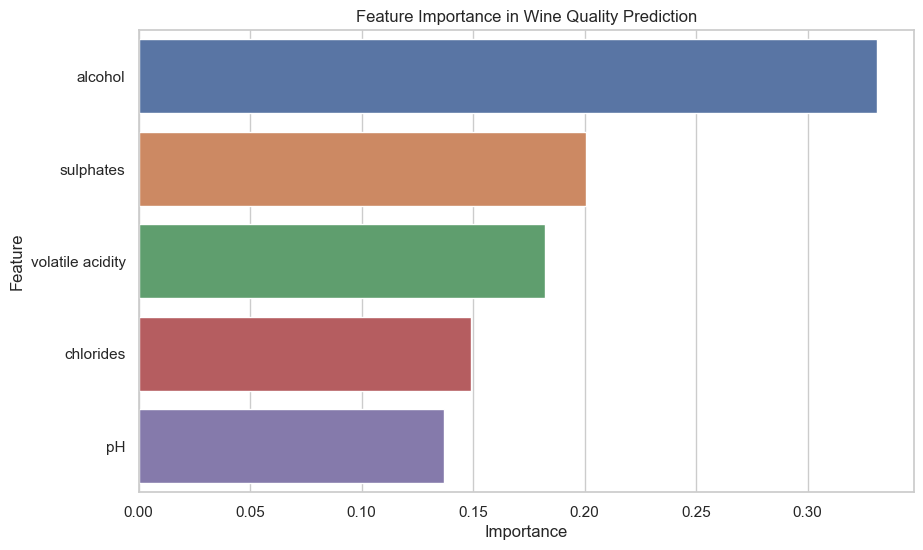


Comparison of feature importance with causal effects:
Feature importance measures predictive power, while causal effects
measure the impact of interventions. They don't always align.

Estimated Effects of Interventions:
            Feature  Intervention Effect
0           alcohol             0.279656
2         sulphates             0.173719
3                pH            -0.053594
4         chlorides            -0.091438
1  volatile acidity            -0.151125


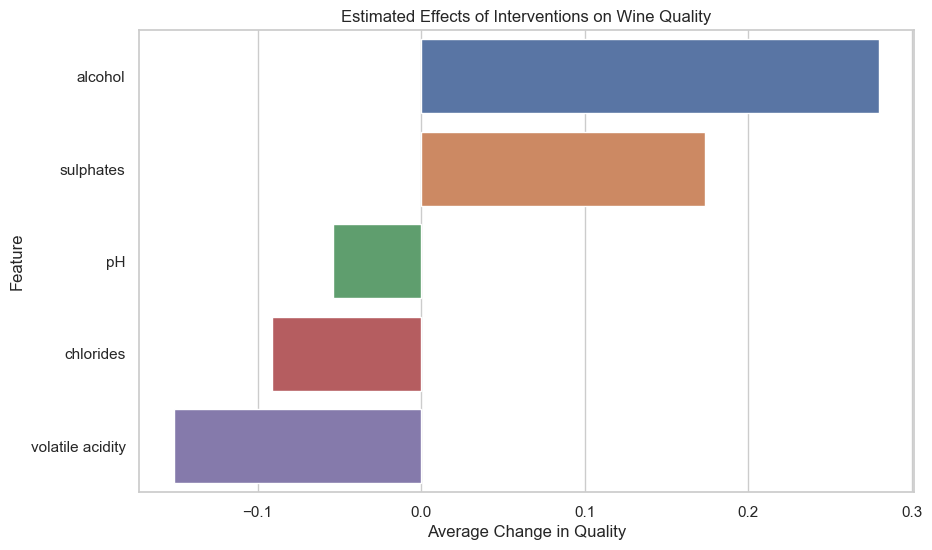

In [66]:
# Create a causal model based on our findings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select features based on causal structure
causal_features = ['alcohol', 'volatile acidity', 'sulphates', 'pH', 'chlorides']
X = wine_data[causal_features]
y = wine_data['quality']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a predictive model
predictive_model = RandomForestRegressor(n_estimators=100, random_state=42)
predictive_model.fit(X_train, y_train)
y_pred = predictive_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Feature importance
importance = predictive_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': causal_features, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Wine Quality Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Compare with intervention effects
print("\nComparison of feature importance with causal effects:")
print("Feature importance measures predictive power, while causal effects")
print("measure the impact of interventions. They don't always align.")

# Simulate interventions
baseline = X_test.copy()
interventions = {}

for feature in causal_features:
    intervened = baseline.copy()
    intervened[feature] = baseline[feature] + baseline[feature].std()
    
    baseline_pred = predictive_model.predict(baseline)
    intervened_pred = predictive_model.predict(intervened)
    
    interventions[feature] = (intervened_pred - baseline_pred).mean()

interventions_df = pd.DataFrame({
    'Feature': list(interventions.keys()),
    'Intervention Effect': list(interventions.values())
}).sort_values('Intervention Effect', ascending=False)

print("\nEstimated Effects of Interventions:")
print(interventions_df)

# Visualize intervention effects
plt.figure(figsize=(10, 6))
sns.barplot(x='Intervention Effect', y='Feature', data=interventions_df)
plt.title('Estimated Effects of Interventions on Wine Quality')
plt.xlabel('Average Change in Quality')
plt.ylabel('Feature')
plt.show()

<h3> Conclusion: From Prediction to Causation </h3>

In this notebook, we've explored the critical role of data preparation in causal analysis, using the wine quality dataset as a case study.
Key takeaways:

**Beyond Correlation:** We've moved beyond simple correlations to estimate causal relationships between wine characteristics and quality.

**Proper Data Preparation:** We've demonstrated how data preparation for causal analysis differs from preparation for predictive modeling. Specifically:

The need to identify and handle confounders

The importance of maintaining causal structure when engineering features

The impact of discretization on causal estimates

Methods for handling missing data in a causal context


**Causal Inference Methods:** We've implemented various approaches to causal inference:

Regression adjustment

Propensity score matching

Instrumental variables

Mediation analysis

Sensitivity analysis

Double Machine Learning


**From Models to Interventions:** We've shown how to move from predictive models to causal models that can inform interventions. This transition is crucial for decision-making in wine production.

**Practical Implementation:** We've demonstrated all concepts with practical Python code, showing how to implement causal inference methods in real-world data analysis.

By understanding and applying these causal inference techniques, we can provide wine producers with actionable insights about how to improve wine quality through specific interventions, rather than just predicting quality based on observed characteristics.
Remember that causality requires both statistical evidence and domain knowledge. The methods presented here generate hypotheses about causal relationships, but these should be validated through experimental studies whenever possible.

<h3>References</h3>

Pearl, J. (2009). Causality: Models, Reasoning, and Inference (2nd edition). Cambridge University Press.

Hernán, M. A., & Robins, J. M. (2020). Causal Inference: What If. Boca Raton: Chapman & Hall/CRC.

Imbens, G. W., & Rubin, D. B. (2015). Causal Inference for Statistics, Social, and Biomedical Sciences: An Introduction. 
Cambridge University Press.

Peters, J., Janzing, D., & Schölkopf, B. (2017). Elements of Causal Inference: Foundations and Learning Algorithms. MIT Press.

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, 47(4), 547-553.

Spirtes, P., Glymour, C., & Scheines, R. (2000). Causation, Prediction, and Search (2nd edition). MIT Press.

Chernozhukov, V., Chetverikov, D., Demirer, M., Duflo, E., Hansen, C., Newey, W., & Robins, J. (2018). Double/debiased machine learning for treatment and structural parameters. The Econometrics Journal, 21(1), C1-C68.

<h3> License </h3>
 
This notebook is released under the MIT License.

Copyright (c) 2025 Mukul Desai

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.